In [6]:
import numpy as np

## Task 1

$$
M = \begin{bmatrix}
100 & 150 & 200 \\
50 & 100 & 150 \\
0 & 50 & 100
\end{bmatrix}, \quad
E = \begin{bmatrix}
20 & 30 & 40 \\
10 & 20 & 30 \\
5 & 10 & 15
\end{bmatrix}
$$


Необхідно реалізувати три алгоритми обробки:

1. Зміна контрасту. Необхідно зменшити яскравість зображення $M$. Це множення матриці на скаляр (число) λ. Кожен елемент матриці множиться на це число 0.5
2. Корекція яскравості. Це додавання скаляра c до матриці $M$ . Число додається до кожного елемента матриці. Додайте до зображення $M$ число 25. Це збільшить яскравість кожного пікселя на 25.
3. Змішування (Blending). Ми створюємо нове зображення, змішуючи оригінал та ефект у певній пропорції. Для цього створи нове зображення як лінійну комбінацію: `0.8 * M + 0.2 * E`.Це імітує прозорість ефекту.
 

In [7]:
M = np.array([[100, 150, 200], [50, 100, 150], [0, 50 , 100]])
E = np.array([[20, 30, 40], [10, 20, 30], [5, 10, 15]])
alpfa = 0.5
c = 25

# 1.1 (Contrast): mutliply M by scalar (alpfa)
M_contrast = alpfa * M
print(f"Contrast result: {M_contrast}")

# 1.2 (Brightness): add scalar (c) to M
M_brightness = c + M
print(f"Brightness result: {M_brightness}")

# 1.3 (Blending): linear combination of 0.8M + 0.2E
M_blending = 0.8 * M + 0.2 * E
print(f"Blending result: {M_blending}")

Contrast result: [[ 50.  75. 100.]
 [ 25.  50.  75.]
 [  0.  25.  50.]]
Brightness result: [[125 175 225]
 [ 75 125 175]
 [ 25  75 125]]
Blending result: [[ 84. 126. 168.]
 [ 42.  84. 126.]
 [  1.  42.  83.]]


## Task 2

Вектор профілю користувача: u=(8,2,5)

Та три фільмів.

- Фільм A (Action Movie):  =(9,1,2)
- Фільм B (Comedy Movie): =(1,9,8)
- Фільм C (Drama Movie): =(7,2,6)
Ваша задача — знайти фільм, який найбільше підходить користувачу, порівнявши вектори їхніх характеристик.

In [16]:
user = np.array([8,2,5])

movies = {
    "Action": np.array([9,1,2]),
    "Comedy": np.array([1,9,8]),
    "Drama": np.array([7,2,6])
}

def cosine_similarity(v1, v2):
    dot_prod = np.dot(v1,v2)
    
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    
    cos = dot_prod / (norm_v1 * norm_v2) # cosine similarity formula
    return cos

results = {}
for name, vector in movies.items():
    score = cosine_similarity(user, vector)
    results[name] = score
    print(f"Similarity with {name}: {score:.2f}")

best = max(results)
print(f"The best film is: {best} with score {results[best]:.2f}")


Similarity with Action: 0.94
Similarity with Comedy: 0.57
Similarity with Drama: 0.99
The best film is: Drama with score 0.99


## Task 3

Відомі витрати на один дрон, це матриця A, де стовпці — це типи дронів:

- "Розвідник": 4 мотори, 1 контролер, 1 акумулятор.
- "Камікадзе": 4 мотори, 1 контролер, 2 акумулятори.
- "Вантажний": 6 моторів, 2 контролери, 4 акумулятори.


Всього за зміну було витрачено вектор b:

- 460 моторів
- 130 контролерів
- 240 акумуляторів

In [31]:
A = np.array([[4,4,6], [1,1,2], [1,2,4]])
b = np.array([[460], [130], [240]])

#  Check if the matrix has solutions
det = np.linalg.det(A)
print(f"Determinant: {det:.2f}") # det is not 0 so the solution exists

if det != 0:
    solution = np.linalg.solve(A, b)
    print(f"x1(Розвідник): {solution[0][0]}")
    print(f"x2(Камікадзе): {solution[1][0]}")
    print(f"x3(Вантажний): {solution[2][0]}")

    # Solution check
    check = A @ solution
    print(f"Check: {check}") # equals b -> correct

Determinant: -2.00
x1(Розвідник): 20.0
x2(Камікадзе): 50.0
x3(Вантажний): 30.0
Check: [[460.]
 [130.]
 [240.]]


## Task 4

Дано виміри завантаження CPU $y$ протягом 5 годин $t$:

Час t=[1,2,3,4,5]

Навантаження y=[22,28,37,45,53]

Initial A: [[1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]]
Initial b: [[22]
 [28]
 [37]
 [45]
 [53]]
Transpose A: [[1 2 3 4 5]
 [1 1 1 1 1]]
A_T * A_matrix: [[55 15]
 [15  5]]
A_T * b_vector: [[634]
 [185]]
k: 7.9
b: 13.3
Built-in: [[ 7.9]
 [13.3]]
Equation:
y = 7.9 * 6 + 13.3


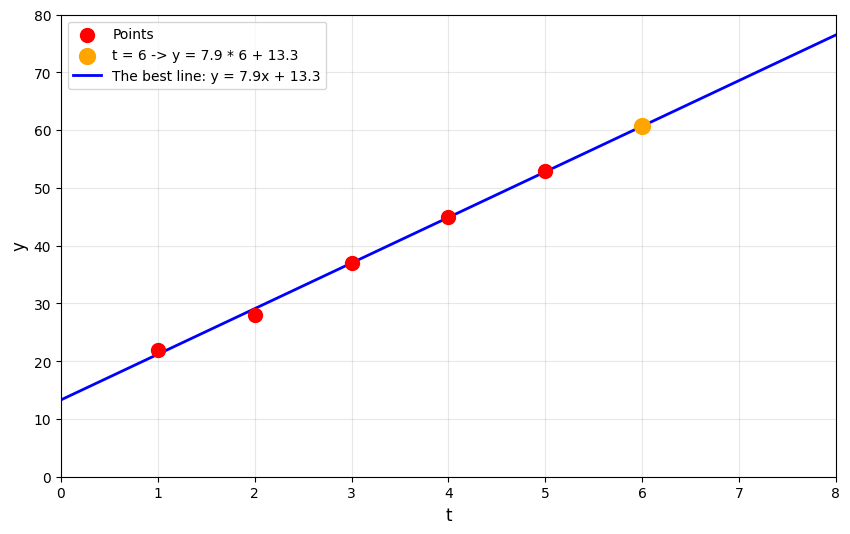

In [48]:
import matplotlib.pyplot as plt

# Matrix of t and ones(1.)
A_matrix = np.array([[1, 1], [2,1], [3,1], [4,1], [5, 1]])
print(f"Initial A: {A_matrix}")
# Vector of y 
b_vector = np.array([[22], [28], [37], [45], [53]])
print(f"Initial b: {b_vector}")

# --- Solve MLS ---
# Transpose the A
A_T = A_matrix.transpose() # or .T
print(f"Transpose A: {A_T}")
# A_T * A * x = A_T * b
A_T_A_matrix = A_T @ A_matrix
A_T_b_vector = A_T @ b_vector
print(f"A_T * A_matrix: {A_T_A_matrix}")
print(f"A_T * b_vector: {A_T_b_vector}")

#  Solve system
result = np.linalg.solve(A_T_A_matrix, A_T_b_vector)
print(f"k: {result[0][0]:.1f}")
print(f"b: {result[1][0]:.1f}")


#  --- Built-in check ---
res_built_in = np.linalg.lstsq(A_matrix, b_vector)
print(f"Built-in: {res_built_in[0]}")

# --- 6th hour ---
t = 6
print("Equation:")
print(f"y = {result[0][0]:.1f} * {t} + {result[1][0]:.1f}")
y = result[0] * t + result[1]

#  Visual
# Points to plot
t_points = np.array([1, 2, 3, 4, 5])
y_points = np.array([22,28,37,45,53])

# Line
x_line = np.linspace(0, 8, 100)
# y = ax + b
y_line = result[0] * x_line + result[1]

plt.figure(figsize=(10, 6))
plt.scatter(t_points, y_points, color='red', s=100, zorder=3, label='Points')
plt.scatter(t, y, color='orange', s=130, zorder=3, label=f't = 6 -> y = {result[0][0]:.1f} * {t} + {result[1][0]:.1f}')
plt.plot(x_line, y_line, 'b-', linewidth=2, label=f'The best line: y = {result[0][0]:.1f}x + {result[1][0]:.1f}')
plt.grid(True, alpha=0.3)
plt.xlabel('t', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend()
plt.xlim(0, 8)
plt.ylim(0, 80)
plt.show()